# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [15]:
# Import the required libraries and dependencies
# YOUR CODE HERE
import pandas as pd
from pathlib import Path
import numpy as np
import sys
sys
from yahoo_api import *
# from yahoo_api import yahoo_api_call


%matplotlib inline


In [16]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
# YOUR CODE HERE
# 'BTC-USD', 'ETH-USD', 'T', 'XOM', 'AAPL', 'MSFT', 'SQ', 'AGG', 'SPY'
tickers_index=['BTC-USD','ETH-USD','SQ','SHOP','TSLA','NVDA','AAPL','GOOG','MSFT','SPY','AGG']

historical_data_df = historical_prices(tickers_index)


Waiting 100 seconds to avoid overloading the API


In [17]:
historical_data_df

BTC-USD                                             ETH-USD  \
                open      high       low     close       volume     open   
date                                                                       
11-08-2017   7446.83   7446.83   7101.52   7143.58   3226249984   308.64   
11-09-2017   7173.73      7312   6436.87   6618.14   5208249856   320.67   
11-10-2017   6618.61   6873.15   6204.22    6357.6   4908680192   298.59   
11-13-2017   6561.48   6764.98   6461.75   6635.75   3197110016   316.76   
11-14-2017   6634.76   7342.25   6634.76   7315.54   4200880128   337.96   
...              ...       ...       ...       ...          ...      ...   
01-20-2023  22677.43  23282.35  22511.83  22777.63  32442278429  1659.71   
01-23-2023  22929.63  23134.01  22549.74  22636.47  26405069715  1627.85   
01-24-2023  22639.27   23722.1  22406.08  23117.86  30685366709  1556.81   
01-25-2023  23108.96  23237.08  22911.37  23032.78  26357839322  1611.08   
01-26-2023  23030.72  23417.72  22654.59  23078.73  25383335641  1603.08   

                                                    ...     SPY          \
               high      low    close       volume  ...    open    high   
date                                                ...                   
11-08-2017   329.45   307.06   320.88    893249984  ...  258.47  259.22   
11-09-2017   324.72   294.54   299.25    885985984  ...  257.73  258.39   
11-10-2017   319.45   298.19   314.68    842300992  ...  257.73  258.29   
11-13-2017   340.18   316.76   337.63   1069680000  ...  257.31  258.59   
11-14-2017   340.91   329.81   333.36    722665984  ...  257.41  257.85   
...             ...      ...      ...          ...  ...     ...     ...   
01-20-2023  1674.18  1626.81  1627.12   8859250310  ...   390.1  396.04   
01-23-2023  1639.72  1551.39   1556.6   8180274691  ...  396.72  402.65   
01-24-2023  1632.24   1530.8  1611.71  10598973448  ...  398.88  401.15   
01-25-2023   1626.2   1586.6  1603.11   8395315241  ...  395.95   400.7   
01-26-2023     1617  1565.24  1598.16   8124465373  ...  403.13  404.92   

                                         AGG                                   
               low   close    volume    open    high     low   close   volume  
date                                                                           
11-08-2017  258.15  259.11  50469600  109.54   109.6  109.46  109.51  2742600  
11-09-2017  256.36  258.17  95085500  109.39  109.46   109.3  109.43  2479800  
11-10-2017  257.37  258.09  59984700  109.06  109.15  108.97  108.99  1751100  
11-13-2017  257.27  258.33  50228600  109.11  109.11  108.96  108.99  1891600  
11-14-2017  256.52  257.73  61315200  109.01  109.12     109   109.1  2799900  
...            ...     ...       ...     ...     ...     ...     ...      ...  
01-20-2023  388.38  395.88  91544900  100.17  100.26   99.89  100.09  6095800  
01-23-2023  395.72  400.63  84178800    99.8  100.06   99.78   99.84  6573200  
01-24-2023  397.64   400.2  59524900   99.84  100.32   99.68  100.28  6538600  
01-25-2023  393.56  400.35  84800300  100.26  100.47   100.1   100.4  5431000  
01-26-2023  400.03  404.75  72287400  100.33  100.46  100.07  100.23  5399100  

[1312 rows x 55 columns]

In [27]:
historical_data_df['close']

KeyError: 'close'

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [21]:
one_year_close_price = historical_prices(tickers_index).loc['11-08-2017':'01-08-2018','close']


Waiting 100 seconds to avoid overloading the API


KeyError: 'close'

In [20]:
one_year_close_price

NameError: name 'one_year_close_price' is not defined

#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [ ]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
# YOUR CODE HERE
daily_returns = historical_data_df.pct_change().dropna()
daily_returns.head()

BTC-USD                                           ETH-USD  \
                open      high       low     close    volume      open   
date                                                                     
11-09-2017 -0.036673 -0.018106 -0.093593 -0.073554  0.614335  0.038977   
11-10-2017 -0.077382 -0.060018 -0.036143 -0.039368 -0.057518 -0.068856   
11-13-2017 -0.008632 -0.015738  0.041509  0.043751 -0.348682  0.060853   
11-14-2017  0.011168  0.085332  0.026774  0.102444  0.313962  0.066928   
11-15-2017  0.103769  0.085141  0.081664  0.076023  0.219699 -0.013374   

                                                    ...       SPY            \
                high       low     close    volume  ...      open      high   
date                                                ...                       
11-09-2017 -0.014357 -0.040774 -0.067408 -0.008132  ... -0.002863 -0.003202   
11-10-2017 -0.016229  0.012392  0.051562 -0.049307  ...  0.000000 -0.000387   
11-13-2017  0.064893  0.062276  0.072931  0.269950  ... -0.001630  0.001161   
11-14-2017  0.002146  0.041198 -0.012647 -0.324409  ...  0.000389 -0.002862   
11-15-2017 -0.013933 -0.018799 -0.007319  0.103212  ... -0.003069 -0.002443   

                                               AGG                      \
                 low     close    volume      open      high       low   
date                                                                     
11-09-2017 -0.006934 -0.003628  0.884015 -0.001369 -0.001277 -0.001462   
11-10-2017  0.003940 -0.000310 -0.369150 -0.003017 -0.002832 -0.003019   
11-13-2017 -0.000389  0.000930 -0.162643  0.000458 -0.000366 -0.000092   
11-14-2017 -0.002915 -0.002323  0.220723 -0.000917  0.000092  0.000367   
11-15-2017 -0.003470 -0.005005  0.317968  0.002293  0.002383  0.001284   

                                
               close    volume  
date                            
11-09-2017 -0.000731 -0.095821  
11-10-2017 -0.004021 -0.293854  
11-13-2017  0.000000  0.080235  
11-14-2017  0.001009  0.480176  
11-15-2017  0.001925 -0.108647  

[5 rows x 55 columns]

---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

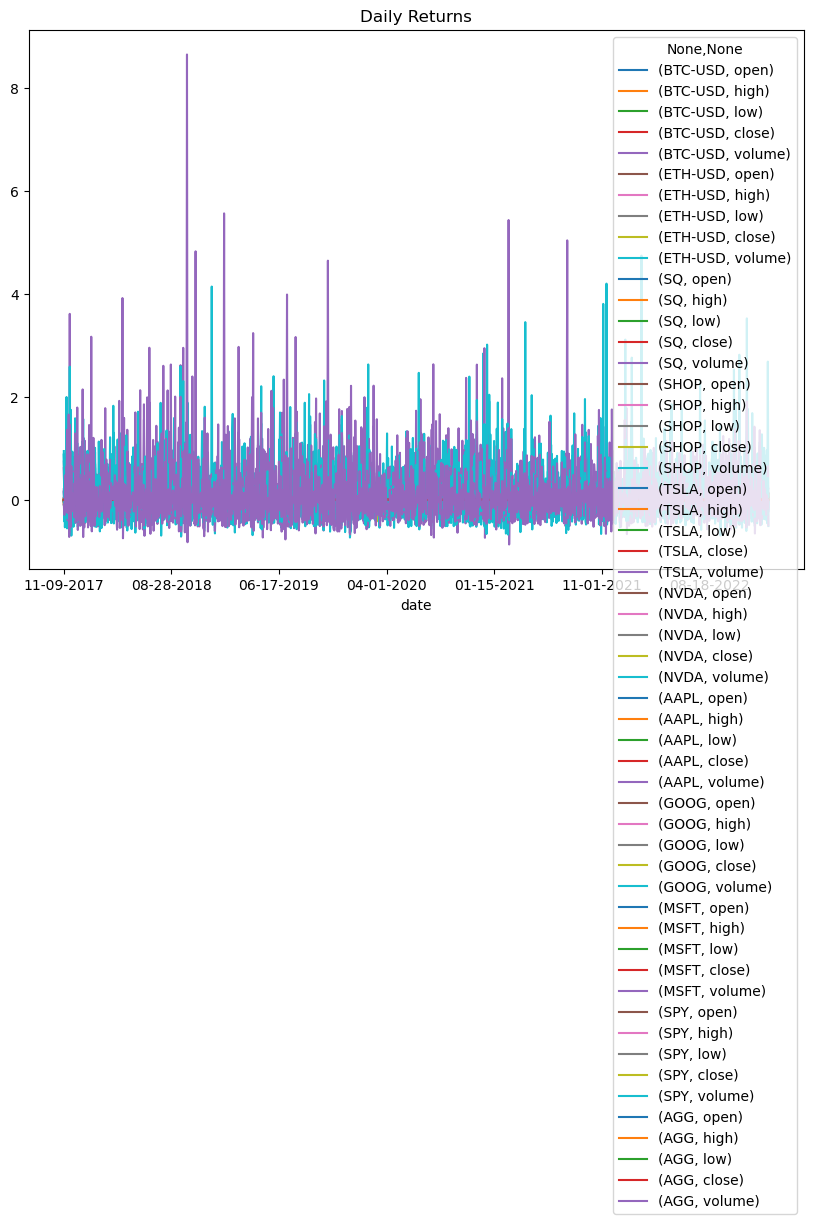

In [ ]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
# YOUR CODE HERE
daily_returns.plot(figsize = (10,7), title = "Daily Returns")

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [ ]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
# YOUR CODE HERE
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(10,5), title="4 fund portfolios and the S&P 500 Cumulative Returns")
cumulative_returns.head()





#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
ax = cumulative_returns.plot(figsize=(10,5), title="4 fund portfolios and the S&P 500 Cumulative Returns")





#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** none outperforms the S&P 500. 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
daily_returns.plot(kind="box", figsize=(10,7), title="volatility")


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
no_sp= daily_returns.drop(columns=["S&P 500"]).copy()
new_data = no_sp.plot(kind="box", figsize=(10,7), title="return data for only the 4 fund portfolios")



# new_data = whale_navs_csv.drop(columns=["S&P 500"])
# new_data.plot(kind="box", figsize=(10,7), title="Four Funds boxplot")
# new_data_daily_returns = new_data.pct_change().dropna()





#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Berkshire is the most volitile as it has longer whisker and outliers. the least volatile in Tiger Global Management as it has smaller whisker. 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [ ]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
# YOUR CODE HERE

standards_deviation = daily_returns.std()
standards_deviation.sort_values()




#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [ ]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
# YOUR CODE HERE
annualized_standards_deviation = standards_deviation * np.sqrt(252)
annualized_standards_deviation.sort_values()


#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
daily_returns.rolling(window=21).std().plot(figsize=(15,10), title="21-Day Rolling std of Funds and S&P 500")



#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
new_data_daily_returns = no_sp.rolling(window=21).std().plot(figsize=(15,10), title="21-Day Rolling std of Funds")

# new_data_daily_returns = new_data.pct_change().dropna()
# new_data_daily_returns.head()

# new_data_daily_returns.rolling(window=21).std().plot(figsize=(15,10), title="21-Day Rolling std of Funds and S&P 500")



#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** none as the S&P has the highest standard deviation of 18% and the rest of the data has lower SD than 18%

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** yes mostly all of them increase at the same time as that the S&P 500 increases. 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Berkshire is the one that poses most risk most of the time particularly from 2017 to 2020.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [ ]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
# YOUR CODE HERE
trading_days = 252
annual_average_returns = daily_returns.mean() * trading_days
annual_average_returns.sort_values

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [ ]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE
annualized_sharpe_ratio = annual_average_returns/ annualized_standards_deviation
annualized_sharpe_ratio.sort_values()

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
annualized_sharpe_ratio.plot(kind="bar")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Berkshire is the one that offers the best risk-return profile as it has the highest sharpe ratio and the worse one would be Paulson as it has a negative sharpe ratio. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [ ]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
# YOUR CODE HERE
sp_variance = daily_returns["S&P 500"].rolling(window=60).var()
sp_variance.tail()

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [ ]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE
covariance= daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns["S&P 500"])
covariance.tail()


##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE
beta = (covariance/sp_variance) 
beta.tail()


##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [ ]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE
beta.mean()

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
beta.plot(figsize=(10,7), title="60-Day Rolling Beta: BERKSHIRE HATHAWAY INC")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [ ]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE
covariance_1 = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns["S&P 500"])
covariance_1.tail()


##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE
beta_1 = covariance_1/sp_variance
beta_1.tail()


##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [ ]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE
beta_1.mean()


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
beta_1.plot(figsize=(15,10), title="60-Day Rolling Beta: SOROS FUND MANAGEMENT LLC")


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Berkshire as it has higher beta than the other fund.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Berkrshire as it has higher sharpe ratio and also higher beta than the other fund. 

---